In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
train_imgs = os.listdir(r'D:\Docs\Datasets\interview\train\images')
train_masks = os.listdir(r'D:\Docs\Datasets\interview\train\labels')

#### Checking if all the images have the corresponding masks

In [3]:
for i in train_imgs:
    if i[:-4] + '_Annotation.png' not in train_masks:
        print(i)

230_2HC.png


#### One image does not have a mask, so we can drop one image

In [4]:
#Total images
print(len(train_imgs) - 1)

59


In [5]:
val_imgs = os.listdir(r'D:\Docs\Datasets\interview\val\images')
val_masks = os.listdir(r'D:\Docs\Datasets\interview\val\labels')

for i in val_imgs:
    if i[:-4] + '_Annotation.png' not in val_masks:
        print(i)
        
#There are no missing masks

In [6]:
#Total val images
print(len(val_imgs))

10


#### Checking distribution of class in masks

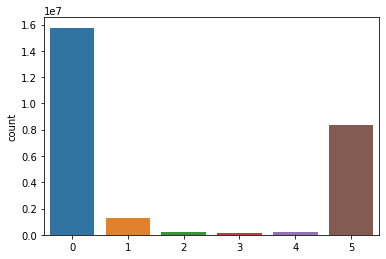

In [7]:
mask_pixel_vals = []
for img_name in train_masks:
    path = os.path.join(r'D:\Docs\Datasets\interview\train\labels',img_name)
    img = cv2.imread(path,0)
    mask_pixel_vals.append(img.flatten())

arr = np.array(mask_pixel_vals)
sns.countplot(arr.flatten())
plt.show()

In [8]:
label_dic = pd.Series(arr.flatten()).value_counts()
print(label_dic)

0    15756800
5     8345791
1     1269997
4      224087
2      210448
3      112877
dtype: int64


#### There is a lot of class imbalance and needs to be handled while training

### Checking size and size imbalances

In [9]:
print(img.shape)

(540, 800)


In [10]:
for img_name in train_imgs:
    path = os.path.join(r'D:\Docs\Datasets\interview\train\images',img_name)
    img = cv2.imread(path)
    if img.shape != (540,800,3):
        print(img_name)

In [11]:
# So every image has the same size 540,800

### Checking Min Max Values

In [12]:
train_pixel_vals = []
for img_name in train_imgs:
    path = os.path.join(r'D:\Docs\Datasets\interview\train\images',img_name)
    img = cv2.imread(path)
    train_pixel_vals.append(img.flatten())

arr = np.array(train_pixel_vals)
print(f'Max value: {np.max(arr)}')
print(f'Min value: {np.min(arr)}')
#normal range 0-255

Max value: 254
Min value: 0


#### Checking for grayscale 

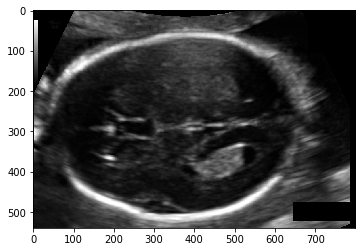

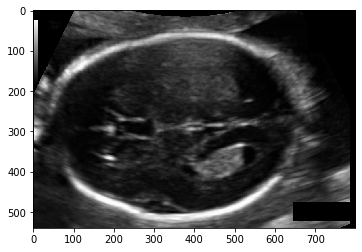

In [13]:
random_img = os.path.join(r'D:\Docs\Datasets\interview\train\images',train_imgs[0])
gray_img = cv2.imread(random_img,0)

color_img = cv2.imread(random_img)
plt.imshow(gray_img,cmap='gray')
plt.show()
plt.imshow(color_img)
plt.show()

### So given images are grayscale and single channel can be used

### Now we can build a model from these conclusions